In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Задание 0.
Для чего фиксируем сиды в домашках

Ответ: чтобы получить воспроизводимые результаты.?

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


# Задание 1.(0.4 балла)
# Выполните операции, направленные на базовое исследование данных:

# Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
# Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
# Постройте дашборд в одну строку, используя ydata-profilling(0.15 балла)
# Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [16]:
print(f'Кол-во дубликатов в train: {df_train.duplicated().sum()}')
print(f'Кол-во дубликатов в test : {df_test.duplicated().sum()}')

Кол-во дубликатов в train: 985
Кол-во дубликатов в test : 62


In [21]:
from ydata_profiling import ProfileReport

df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)
profile_train = ProfileReport(df_train, title="Дашборд train", explorative=True)
profile_train.to_file("dashboard_train.html")
profile_test = ProfileReport(df_test, title="Дашборд test", explorative=True)
profile_test.to_file("dashboard_test.html")
profile_all = ProfileReport(df_all, title="Дашборд all", explorative=True)
profile_all.to_file("dashboard_all.html")

Базовые выводы по дашбордам.
1. Почти 3% пропусков в столбцах mileage, engine, max_power, torque, seats на train и 2% пропусков в тех же столбцах на test
2. Много дублированных строк в train: 7%, некоторые строки дублируются по 30 раз. На test 3.3% дублей.
3. Ожидаемо высокая корреляция цены продажи авто к году выпуска, пробегу и типу коробки передач. Есть предположение, что должна быть высокая корреляция к сочетанию атрибутов fuel + mileage, но в отчете эта информация отсутствует.
4. Большой перекос в сторону авто с механической коробкой, что типично для Индийского рынка.
5. Большинство предложений от индивидуальных клиентов, у к-рых цена в среднем должна быть меньше, чем у дилеров.
6. Размерность значения расхода топлива (milage) определяется видом топлива, т.е. для бензина/дизеля это литры на километр пробега, а для lpg - кг/км, потребуется парсинг и доп. обработка.
7. Значение крутящего момента (torque) потребует дополнительного парсинга и приведения к единой шкале измерений, т.к. присутствуют значения в ньютон-метрах (Nm), а также в килограмм-метрах(kgm).

# Задание 2 (0.2 балла)
# Проанализируйте статистики датасета.

# Ваша задача:

# Посчитайте основные статистики по числовым столбцам для трейна и теста
# Посчитайте основные статистики по категориальным столбцам для трейна и теста
# Сравните среднее и медиану внутри train, внутри test и между собой. О чём могут говорить результаты?

In [24]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [27]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [28]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [29]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Выводы.
Как на трейне так и на тесте медиана по пробегу и цене продажи существенно отличается от среднего. 
Это сигнализирует о наличии выбросов в данных по этим атрибутам.

# Задание 3 (0.2 балла)
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
# Отобразите такие объекты (0.05 балла)
# Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [50]:
duplicates = df_train[df_train.drop('selling_price', axis=1).duplicated(keep=False)]
duplicates.sort_values(by=['name','selling_price','km_driven','torque']).head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


In [57]:
df_train.drop_duplicates(subset=df_train.drop('selling_price', axis=1), inplace=True)
df_train.reset_index(drop=True, inplace=True)
assert df_train.shape == (5840, 13)
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


# Задание 4 (0.3 балла)
# Вы могли заметить, что с признаками mileage, engine, max_power и torque всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав data.dtypes). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

# Задача :

# Уберите единицы измерения для признаков mileage, engine, max_power.
# Приведите тип данных к float.
# Предобработайте признак torque — разделите его на два: собственно torque и max_torque_rpm. Учтите единицы измерения
# Важно

# Все действия нужно производить над обоими датасетами — train и test.

In [117]:
# Реализуем функцию обработки torque

import re

def parse_torque(torque):
    """
    Парсим различные варианты представления значений torque.
    
    Args:
    torque (str): Torque в различных форматах.
    
    Returns:
    tuple: (torque_value, min_rpm, max_rpm) - значение torque, мин rpm, max кзь
    """
    if not isinstance(torque, str) or not torque.strip():
        return (None, None, None)

    # Убираем разделитель разрядов
    torque = torque.replace(',', '')
    # Достаем значение torque и единицу измерения (Nm or kgm)
    torque_match = re.search(r'([\d.]+)\s*(Nm|kgm)', torque, re.IGNORECASE)
    if torque_match:
        torque_value = float(torque_match.group(1))
        unit = torque_match.group(2).lower()
    else:
        # Обрабатываем вариант когда kgm приходит в скобках
        torque_match = re.search(r'([\d.]+)@\s*[\d,]*(?:-\d+)?\((kgm)@.*\)', torque, re.IGNORECASE)
        if torque_match:
            torque_value = float(torque_match.group(1))
            unit = torque_match.group(2).lower()
        else:
            return (None, None, None)

    # Переводим kgm в Nm
    if unit == 'kgm':
        torque_value *= 9.8  # 1 kgm ≈ 9.8 Nm

    # Округлим до 1 знака
    torque_value = round(torque_value, 1)

    # Достаем диапазон rpm или единственное значение
    rpm_match = re.search(r'(\d{1,5}(?:,\d{3})?)(?:[,-]\s*(\d{1,5}(?:,\d{3})?))?\s*rpm', torque, re.IGNORECASE)
    if rpm_match:
        min_rpm = int(rpm_match.group(1).replace(',', ''))  # Remove commas and convert to int
        max_rpm = int(rpm_match.group(2).replace(',', '')) if rpm_match.group(2) else min_rpm
    else:
        match = re.search(r'\s([\d,]+(?:-[\d,]+)?)\s*\(kgm@ rpm\)', torque, re.IGNORECASE)
        if not match:
           min_rpm = None
           max_rpm = None  
        else: 
           values = match.group(1)
        
           # Если в значение содержится - то обрабатываем как диапазон
           if '-' in values:
               min_rpm, max_rpm = map(float, values.split('-'))
           else:  # иначе считаем min = max
               min_rpm = float(values)
               max_rpm = min_rpm
    
    return (torque_value, min_rpm, max_rpm)


In [120]:
df_train[['mileage_val', 'mileage_uom']] = df_train['mileage'].str.extract(r'(\d+\.\d+|\d+)\s*(\S+)')
df_train['engine_val'] = df_train['engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df_train['max_power_val'] = df_train['max_power'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df_train['mileage_val'] = df_train['mileage_val'].astype(float)
df_train[['torque_val', 'min_rpm', 'max_rpm']] = df_train['torque'].apply(lambda x: pd.Series(parse_torque(x)))

In [121]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_val,mileage_uom,engine_val,max_power_val,torque_val,min_rpm,max_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,kmpl,1248.0,74.00,190.0,2000.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,kmpl,1498.0,103.52,250.0,1500.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,kmpl,1396.0,90.00,219.5,1750.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,kmpl,1298.0,88.20,112.7,4500.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,20.14,kmpl,1197.0,81.86,113.8,4000.0,4000.0


In [122]:
df_test[['mileage_val', 'mileage_uom']] = df_test['mileage'].str.extract(r'(\d+\.\d+|\d+)\s*(\S+)')
df_test['engine_val'] = df_test['engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df_test['max_power_val'] = df_test['max_power'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df_test['mileage_val'] = df_test['mileage_val'].astype(float)
df_test[['torque_val', 'min_rpm', 'max_rpm']] = df_test['torque'].apply(lambda x: pd.Series(parse_torque(x)))

In [123]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_val,mileage_uom,engine_val,max_power_val,torque_val,min_rpm,max_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,kmpl,1248.0,74.00,190.0,2000.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,kmpl,1498.0,103.52,250.0,1500.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,kmpl,1396.0,90.00,219.5,1750.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,kmpl,1298.0,88.20,112.7,4500.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,20.14,kmpl,1197.0,81.86,113.8,4000.0,4000.0


# Задание 5 (0.3 балла)
# На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

# Задание:

# Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
# Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
# Как правильно считать медиану для заполнения? Выберите верное утверждение:
# По тестовым свою, по тренировочным — свою
# По тренировочным данным для train и test

In [130]:
# Посчитаем медиану на train и применим ее к train и test. 
# Медиана менее подвержена влиянию выбросов, чем среднее. 
# Используем медиану по тренировочным данным для train и test. Использование медианы из test означало бы "подглядывание" в тестовые данные, что недопустимо.

medians = df_train.median(numeric_only=True)
df_train = df_train.fillna(medians)
df_test = df_test.fillna(medians)

In [134]:
df_train.select_dtypes(include=['number']).isnull().any()

year             False
selling_price    False
km_driven        False
seats            False
mileage_val      False
engine_val       False
max_power_val    False
torque_val       False
min_rpm          False
max_rpm          False
dtype: bool

In [135]:
df_test.select_dtypes(include=['number']).isnull().any()

year             False
selling_price    False
km_driven        False
seats            False
mileage_val      False
engine_val       False
max_power_val    False
torque_val       False
min_rpm          False
max_rpm          False
dtype: bool

# Задание 6 (0.2 балла)
# Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы engnine и seats к приведем к int.

# Осуществите приведение столбцов к необходимому типу.
# Ответье на вопрос — почему (хоть мы этого и не делаем) seats, возможно рассмотреть как категориальную переменную?

In [137]:
df_train['engine_val'] = df_train['engine_val'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [138]:
df_test['engine_val'] = df_test['engine_val'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [ ]:
# Количество мест в типовом автомобиле имеет ограниченное и дискретное число вариантов, иходя из которых автомобиль можно 
# отнести к определенной группе/классу. Между значениями seat не имеют смысла арифметические операции. Также эти значения
# можно закодировать символьными определениями без потери информации. Таким образом поведение значений seat соответствует
# определению категориального признака.

# Задание 7 (0.1 балла)
# Снова вызовите метод describe и проанализируйте статистики.

# Ответье на вопрос:

# Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [139]:
df_train.describe()

,year,selling_price,km_driven,seats,mileage_val,engine_val,max_power_val,torque_val,min_rpm,max_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,5.426712,19.430841,1429.448973,87.906371,175.230514,2654.789897,3041.730822
std,4.095622,5.354320e+05,6.007114e+04,0.982344,3.985973,485.662834,31.640418,107.000335,1118.420113,914.392848
min,1983.000000,2.999900e+04,1.000000e+00,2.000000,0.000000,624.000000,0.000000,47.000000,175.000000,500.000000
25%,2011.000000,2.500000e+05,3.900000e+04,5.000000,16.950000,1197.000000,68.000000,111.800000,1750.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,5.000000,19.370000,1248.000000,81.860000,160.000000,2000.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,5.000000,22.300000,1498.000000,99.000000,200.000000,3750.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,42.000000,3604.000000,400.000000,1862.000000,21800.000000,21800.000000


In [ ]:
# Можно заметить смещение по значениям среднего, медианы и std у числовых признаков. Например, медиана атрибута km_driven изменилась на 16%
# (с 60000 до 70000 ), а медиана целевой переменной selling_price уменьшилась на 10% (с 450000 до 405000). Основная причина изменений - удаленные 
# дубликаты. Иногда заполнение пропусков медианой может сдвинуть среднее и уменьшить дисперсию, но не повлиять на новое значение медианы.

# Задание 8 (0.5 балла)
# Шаг 1.

# Воспользуйтесь pairplot из библиотеки seabron, чтобы визуализировать попарные распределения числовых признаков для train
# По полученному графику ответьте на вопросы:
# Можно ли предположить на основе распределений связь признаков с целевой переменной?
# Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

In [ ]:
### После недолгих раздумий пришел к выводу, что лучше оставить средний RPM, вместо двух колонок min_rpm и max_rpm, 
# между которыми очевидно есть высокая корреляция
df_train['rpm'] = (df_train['min_rpm'] + df_train['max_rpm']) // 2
df_train.drop(['min_rpm', 'max_rpm'], axis=1, inplace=True)
df_test['rpm'] = (df_test['min_rpm'] + df_test['max_rpm']) // 2
df_test.drop(['min_rpm', 'max_rpm'], axis=1, inplace=True)

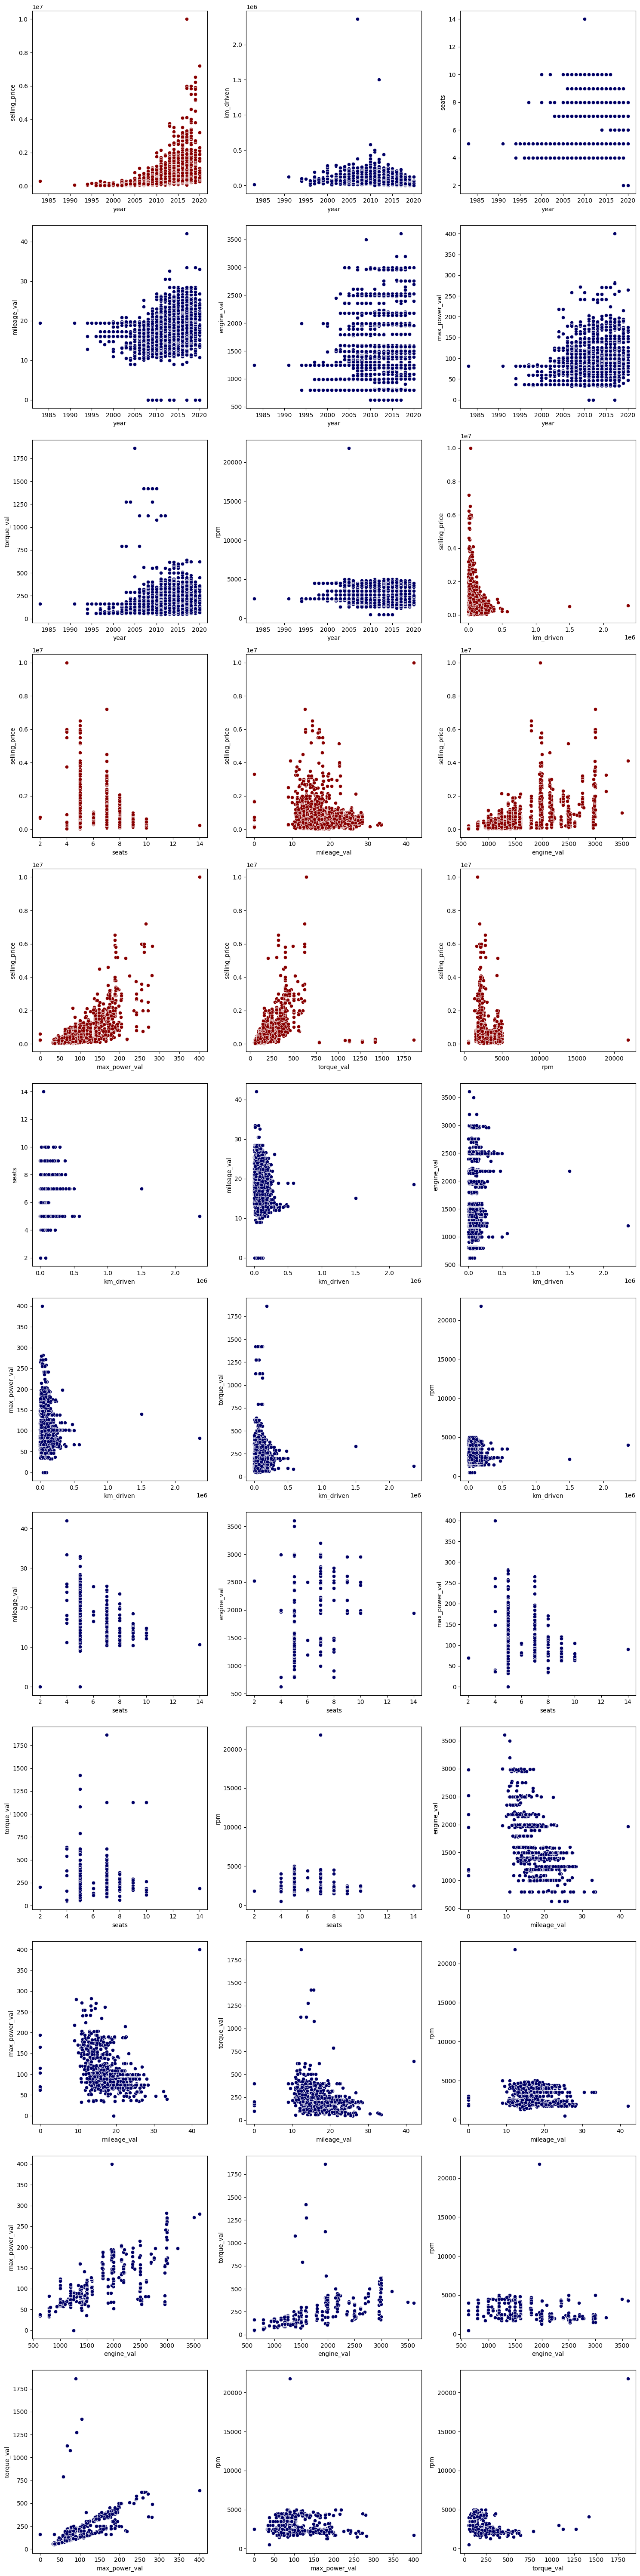

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Включаем отображение графиков в ноутбуке
%matplotlib inline

# Создадим функцию рисования графиков
def draw_pairplot(df):
    # Выберем только числовые атрибуты
    numeric_cols = df.select_dtypes(include=['number'])
    col_pairs = list(combinations(numeric_cols, 2))
    
    # Будем отображать графики в 3 колонки
    n_cols = 3
    n_rows = -(-len(pairs) // n_cols)  
    
    # Создадим subplot, для более удобного отображения графиков
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to make iteration easier
    
    # Отрисовываем графики попарных комбинаций атрибутов
    for i, (feature_x, feature_y) in enumerate(col_pairs):
        # Хотим, чтобы цена всегда была по Y
        if feature_x == 'selling_price':
           feature_x, feature_y = feature_y, 'selling_price'
        # Графики в к-рых присутствует цена отрисуем красным
        color = '#880000' if feature_y == 'selling_price' else '#000066'
        #
        sns.scatterplot(data=df, x=feature_x, y=feature_y, ax=axes[i], color=color)
        
    plt.tight_layout()
    plt.show()

# Отрисуем графики для train
draw_pairplot(df_train)

In [ ]:
# 1. Ожидаемо, параметры двигателя имеют высокую корреляцию между собой - крутящий момент, мощность и объем двигателя.
# 2. Наблюдается зависимость цены продажи авто от вышеуказанных параметров двигателя. 
# 3. Также прослеживается связь мощности двигателя и расхода топлива с годом выпуска - современные авто, как правило, 
#    более мощные, чем их предшественники.
# 4. Отдельно можно наблюдать некоторую зависимость цены автомобиля от года выпуска.


# Шаг 2.

# Постройте pairplot по тестовым данным
# Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

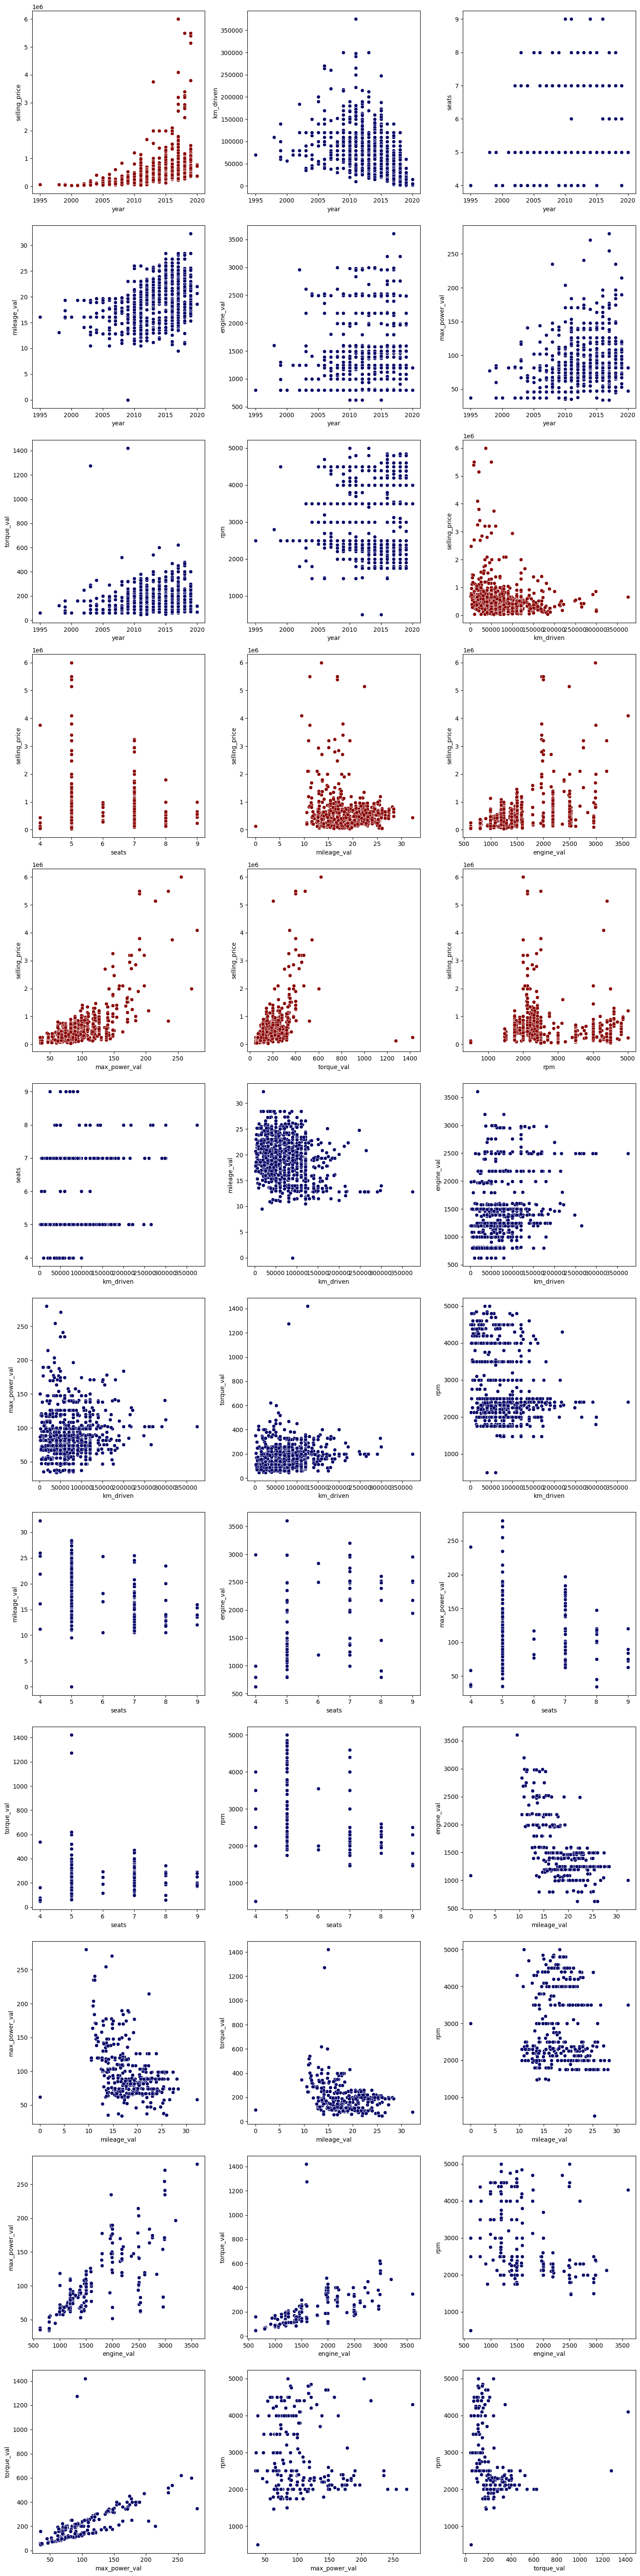

In [174]:
draw_pairplot(df_test)

In [ ]:
# Графики на трейне и тесте в основном схожи между собой.

# Задание 9 (0.5 балла)
# И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

# Задание:

# Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи pd.corr()
# По полученным корреляциям постройте тепловую карту (heatmap из бибилотеки seaborn)

In [175]:
df_train.corr(numeric_only=True)

,year,selling_price,km_driven,seats,mileage_val,engine_val,max_power_val,torque_val,rpm
year,1.000000,0.427279,-0.368966,0.041178,0.341334,0.002819,0.156858,0.054268,0.026858
selling_price,0.427279,1.000000,-0.164828,0.149953,-0.104769,0.447672,0.692814,0.465704,-0.174887
km_driven,-0.368966,-0.164828,1.000000,0.192328,-0.182086,0.229766,0.024588,0.111877,-0.226424
seats,0.041178,0.149953,0.192328,1.000000,-0.451059,0.652172,0.244112,0.316947,-0.290509
mileage_val,0.341334,-0.104769,-0.182086,-0.451059,1.000000,-0.572893,-0.373390,-0.234541,-0.100089
engine_val,0.002819,0.447672,0.229766,0.652172,-0.572893,1.000000,0.681117,0.598077,-0.375256
max_power_val,0.156858,0.692814,0.024588,0.244112,-0.373390,0.681117,1.000000,0.659159,-0.146858
torque_val,0.054268,0.465704,0.111877,0.316947,-0.234541,0.598077,0.659159,1.000000,-0.361795
rpm,0.026858,-0.174887,-0.226424,-0.290509,-0.100089,-0.375256,-0.146858,-0.361795,1.000000


<Axes: >

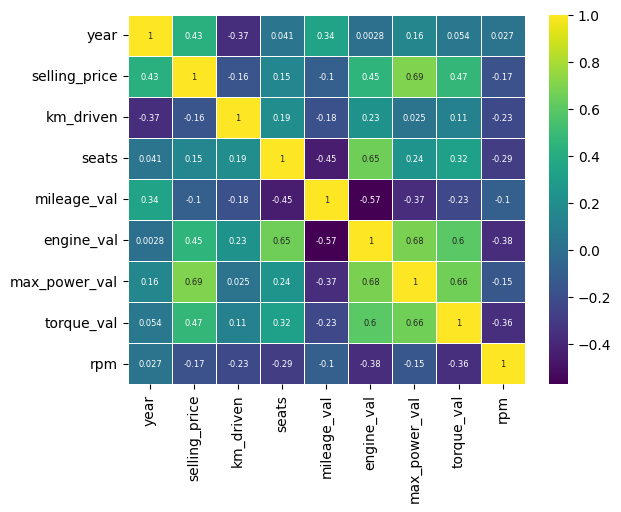

In [178]:
sns.heatmap(df_train.corr(numeric_only=True),
            linewidths=0.5, 
            annot=True,
            cmap='viridis',
            linecolor="white", 
            annot_kws = {'size':6})

# Ответьте на вопросы:
# Какие 2 признака наименее скоррелированы между собой?
# Между какими наблюдается довольно сильная положительная линейная зависимость?
# Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [ ]:
# 1. Признаки engine_val и year наименее скоррелированы (corr = 0.0028).
# 2. Подтверждая визуальные предположения из графиков, следующие признаки имеют высокую корреляцию: мощность двигателя его объем, 
#    крутящий момент, а также цена продажи коррелирует с мощностью двигателя. Заметна неожиданно высокая корреляция объема двигателя 
#    с вместимостью автомобиля. Также присутствует ожидаемая обратная корреляция объема двигателя и расхода топлива.
# 3. Опираясь на данные можно заключить наличие умеренной отрицательной корреляции между годом выпуска и километражом к моменту продажи.

# Задание 10 (0.6 балла)
# По умолчанию pd.corr возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, # попробуйте измерить другие способы вычисления корреляций.

# Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только numpy). Сравните результаты вычисления с # # библиотечной реализацией
# Постройте матрицу корреляции phik

# Проинтерпретируйте результаты

In [205]:
import numpy as np
from scipy.stats import spearmanr 


def dense_rank(arr):
    unique_values = np.unique(arr)
    rank_dict = {val: rank for rank, val in enumerate(sorted(unique_values), start=1)}
    return np.array([rank_dict[val] for val in arr])


# Функция ручного подсчета корреляции Спирмена между двумя массивами
# Используется формула:
#  corr = 1 - 6*Sum(d[i]^2) / (n * (n^2 - 1)), где
#     d[i] - разница рангов для i-го элемента
#     n - кол-во элементов    
def spearman_manual(x, y):
    if len(x) != len(y):
        raise ValueError("Длины массивов x и y должны совпадать")

    # Преобразуем данные в ранги
    rank_x = dense_rank(x)  
    rank_y = dense_rank(y)
    rank_x = np.argsort(np.argsort(x))
    rank_y = np.argsort(np.argsort(y))
    # Вычисляем разницу рангов
    d = rank_x - rank_y
    
    # Calculate Spearman correlation
    n = len(x)
    rho = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
    
    # Вычисляем коэффициент Спирмена
    #n = len(x)
    #corr = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
    return rho


# Получим список только числовых колонок
numeric_cols = list(df_train.select_dtypes(include=['number']))

# Посчитаем коэфф-т корреляции Спирмена
manual_corr = [[spearman_manual(df_train[row], df_train[col]) for col in numeric_cols] for row in numeric_cols]

# Посчитаем с использованием библиотеки
lib_corr = [[spearmanr(df_train[row], df_train[col])[0] for col in numeric_cols] for row in numeric_cols]

# Преобразуем в датафрейм для наглядности
df_manual = pd.DataFrame(manual_corr, 
                         columns=numeric_cols,  
                         index=numeric_cols
                         )
df_lib = pd.DataFrame(lib_corr, 
                      columns=numeric_cols,  
                      index=numeric_cols
                      )
# Сравним результаты
df_manual - df_lib

,year,selling_price,km_driven,seats,mileage_val,engine_val,max_power_val,torque_val,rpm
year,0.000000,-0.002062,0.003441,0.002195,-0.003172,0.003379,0.001077,0.001983,-0.002349
selling_price,-0.002062,0.000000,-0.000034,-0.096934,-0.000022,-0.001711,0.000095,-0.000141,0.000221
km_driven,0.003441,-0.000034,0.000000,-0.089863,0.000779,-0.001093,-0.000456,-0.001528,0.001261
seats,0.002195,-0.096934,-0.089863,0.000000,0.128237,-0.166055,-0.104170,-0.149290,0.101191
mileage_val,-0.003172,-0.000022,0.000779,0.128237,0.000000,0.000884,0.000140,-0.000029,0.002396
engine_val,0.003379,-0.001711,-0.001093,-0.166055,0.000884,0.000000,-0.001587,-0.002087,0.002176
max_power_val,0.001077,0.000095,-0.000456,-0.104170,0.000140,-0.001587,0.000000,-0.000820,-0.000505
torque_val,0.001983,-0.000141,-0.001528,-0.149290,-0.000029,-0.002087,-0.000820,0.000000,0.002224
rpm,-0.002349,0.000221,0.001261,0.101191,0.002396,0.002176,-0.000505,0.002224,0.000000


In [203]:
# Как видно, результаты использования собственного алгоритма расчета коэф-та корреляции Спирмена в большинстве
# случаев совпадают с библиотечными значениями с точностью до тысячных

#---------------------------------------------------------------------------------------------------------------

# Часть 2 (1.7 балла) | Модель только на вещественных признаках
# В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

# Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

# За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

In [ ]:
#Задание 11 (0.05 балла)
# Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки
# и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

# В переменные y_train и y_test запишите значения целевых переменных.

In [211]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(include=['number']).drop(['selling_price'], axis=1)
# assert X_test.shape == (1000, 6) - убираем assert, т.к. после парсинга параметров двигателя получилось 8 числовых признакомв, а не 6

In [212]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(include=['number']).drop(['selling_price'], axis=1
#assert X_test.shape == (1000, 6) - убираем assert, т.к. после парсинга параметров двигателя получилось 8 числовых признакомв, а не 6

In [210]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   int64  
 1   km_driven      5840 non-null   int64  
 2   seats          5840 non-null   int32  
 3   mileage_val    5840 non-null   float64
 4   engine_val     5840 non-null   int32  
 5   max_power_val  5840 non-null   float64
 6   torque_val     5840 non-null   float64
 7   rpm            5840 non-null   float64
dtypes: float64(4), int32(2), int64(2)
memory usage: 319.5 KB


In [214]:
assert X_test.shape == (1000, 8)

# Задание 12. (0.2 балла)
# Построим нашу первую модель!

# Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте и для трейна и для теста.
# Сделайте выводы по значениям метрик качества.

In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
model.coef_

Train R^2: 0.6016
Test R^2: 0.5994
Train MSE: 114197866202.90
Test MSE: 230268703490.55


array([ 4.03669018e+04, -8.27988535e-01, -3.27186296e+04, -2.45302651e+03,
        3.44532841e+01,  1.02898704e+04,  5.91901188e+01, -6.48474125e+01])

In [218]:
# 1. Судя по метрике R2 предсказательная способность модели немного выше средней.
# 2. Большая разница MSE на трейн и тест, а также большие по модулю коэффициенты модели говорят о наличии переобучения.
model.coef_

array([ 4.03669018e+04, -8.27988535e-01, -3.27186296e+04, -2.45302651e+03,
        3.44532841e+01,  1.02898704e+04,  5.91901188e+01, -6.48474125e+01])

<BarContainer object of 8 artists>

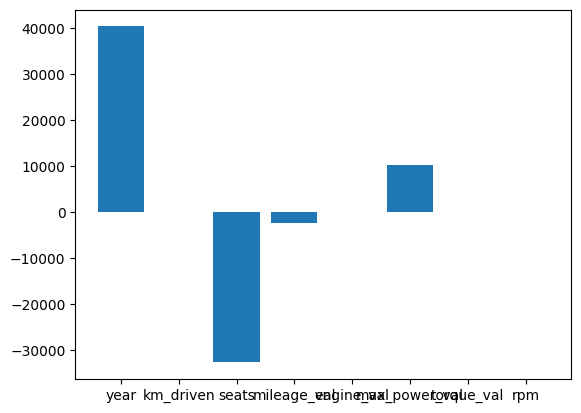

In [220]:
plt.bar(X_train.columns, model.coef_)

# Задание 13 (0.15 балла)
# Реализуйте R^2 руками. Приведите формулу и объясните каждую компоненту метрики

In [223]:
# Функция для вычисления R^2 по формуле:
# R^2 = 1 - (Sum(y - y_pred)^2) / Sum(y - y_avg)^2, 
# где y      - фактическое значение целевой переменной,
#     y_pred - предсказанное значение целевой переменной,
#     y_avg  - среднее значение целевой переменной

def r2_manual(y, y_pred):   
    y_mean = np.mean(y)
    ss_pred = np.sum((y - y_pred) ** 2)
    ss_mean = np.sum((y - y_mean) ** 2)    
    
    # Вычисляем R^2
    r2 = 1 - (ss_pred / ss_mean)
    return r2

train_r2_manual = r2_manual(y_train, y_train_pred)
test_r2_manual = r2_manual(y_test, y_test_pred)
print(f"Train R^2 (manual): {train_r2_manual:.4f}")
print(f"Test R^2 (manual): {test_r2_manual:.4f}")

Train R^2 (manual): 0.6016
Test R^2 (manual): 0.5994


In [ ]:
# Коэффициент детерминации R^2 показывает, какая доля дисперсии объяснена моделью. В числителе стоит сумма квадратов отклонений 
# предсказанных значений от фактических, т.е. кватратичная ошибка прогноза. В знаменателе - значение дисперсии. 
# Когда значение ошибки мало - R^2 приближается к единице. Если R^2 становится отрицательным, это означает что обычное среднее значение
# дает лучшее предсказание, чем модель.

# Бонус (0.15 балла)
# Реализуйте adjusted R^2.Объясните, когда применяется adjusted R^2?

In [224]:
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

r2_train_adj = adjusted_r2(train_r2_manual, X_train.shape[0], 8)
r2_test_adj = adjusted_r2(test_r2_manual, X_test.shape[0], 8)

print(f"Train R^2 (adjusted): {r2_train_adj:.4f}")
print(f"Test R^2 (adjusted): {r2_test_adj:.4f}")


Train R^2 (adjusted): 0.6010
Test R^2 (adjusted): 0.5962


In [298]:
# Adjusted R^2 корректирует значение R^2 при увеличении кол-ва признаков. Это помогает оценить "полезность" добавления 
# новых признаков в модель и выявить случаи, когда дополнительные признаки приводят лишь к усложнению модели, не неся в себе 
# полезной информации.

# Задание 14 (0.05 балла)
# Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.
# Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор обучайте только на train.

In [297]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_sc, y_train)

# Предсказание и расчет R²
y_train_pred = model.predict(X_train_sc)
y_test_pred = model.predict(X_test_sc)
#
r2_train_sc = r2_score(y_train, y_train_pred)
r2_test_sc = r2_score(y_test, y_test_pred)
#
print(f"Train R^2 (scaled): {r2_train_sc:.4f}")
print(f"Test R^2 (scaled): {r2_test_sc:.4f}")

Train R^2 (scaled): 0.6016
Test R^2 (scaled): 0.5725


# Задание 15 (0.1 балла)
# Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

# Чем больше коэффициент по модулю, тем важнее признак.

# Ответьте на вопрос: Какой признак оказался наиболее информативным в предсказании цены?

In [233]:
model.coef_

array([165313.41352703, -49733.95374499, -32138.1959491 ,  -9776.8606651 ,
        16731.2469147 , 325547.92658245,   6332.82027204, -63269.16860775])

In [235]:
max_coef_ind = np.argmax(np.abs(model.coef_))  # Using absolute value in case of negative coefficients
Main_feature = X_train.columns[max_coef_ind]
Main_feature

'max_power_val'

In [ ]:
# В соответствии с предыдущими наблюдениями, признак max_power_val оказался наиболее информативным в предсказании цены

# Задание 16 (0.25 балла)
# Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся Lasso регрессией. Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

# Задание:

# Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
# Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [246]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_sc, y_train)
#
y_train_pred_sc = lasso_model.predict(X_train_sc)
y_test_pred_sc = lasso_model.predict(X_test_sc)
#
r2_train_lasso = r2_score(y_train, y_train_pred_sc)
r2_test_lasso = r2_score(y_test, y_test_pred_sc)
#
print(f"Train R^2 (lasso): {r2_train_lasso:.4f}")
print(f"Test R^2 (lasso): {r2_test_lasso:.4f}")
print("Коэффициенты модели:", lasso_model.coef_)

Train R^2 (lasso): 0.6016
Test R^2 (lasso): 0.5725
Коэффициенты модели: [165311.14835753 -49733.02003746 -32134.10721596  -9773.46548726
  16729.41271256 325549.53441123   6332.14141116 -63267.06650434]


In [ ]:
# Как видно, регуляризация с параметрами по умолчанию не занулила ни один из весов. По всей видимости, причина в том,
# что веса слишком большие по модулю.

# Задание 17. Финальный рывок (0.4 балла)
# До этого мы с вами использовали train для обучения и test для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

# Кроме того, выжмем максимум из модификаций регрессии. Построим ElasticNet. И сделаем всё по порядку.

# Ваша задача 1:

# Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс GridSearchCV.
# Ответьте на вопросы:
# Сколько грид-сёрчу пришлось обучать моделей?
# Что значит каждый параметр param_grid, который вы заполняли для GridSearch? Опишите каждый
# Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [269]:
from sklearn.model_selection import GridSearchCV

# Задаем сетку параметров для перебора
param_grid = {
    "alpha": list(range(5000, 10000, 50))
}

# Кол-во фолдов
k_folds = 10

# Создание объекта GridSearchCV
lasso = Lasso()
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=k_folds 
)

# Запуск перебора
grid_search.fit(X_train_sc, y_train)

# Лучшие параметры
best_alpha = grid_search.best_params_["alpha"]
best_model = grid_search.best_estimator_

# Проверка занулённых весов
weights = best_model.coef_
zero_weights = np.sum(weights == 0)

# Предсказываем с помощью модели
y_train_pred_grd = best_model.predict(X_train_sc)
y_test_pred_grd = best_model.predict(X_test_sc)
#
r2_train_grd = r2_score(y_train, y_train_pred_grd)
r2_test_grd = r2_score(y_test, y_test_pred_grd)
#

# Результаты
print(f"Train R^2 (GridSearch): {r2_train_grd:.4f}")
print(f"Test R^2 (GridSearch): {r2_test_grd:.4f}")
#
print(f"Лучший коэффициент регуляризации (alpha): {best_alpha}")
print(f"Количество занулённых весов: {zero_weights}")
print(f"Коэффициенты модели: {weights}")

# Количество моделей, обученных в GridSearch

n_alphas = len(param_grid["alpha"])
total_models = k_folds * n_alphas
print(f"Всего обучено моделей: {total_models}")

Train R^2 (GridSearch): 0.5999
Test R^2 (GridSearch): 0.5611
Лучший коэффициент регуляризации (alpha): 7650
Количество занулённых весов: 2
Коэффициенты модели: [154919.08813334 -42260.42525879  -7386.93002072     -0.
      0.         332743.1816468    2119.70226623 -52224.89943324]
Всего обучено моделей: 1000


In [262]:
# Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для ElasticNet регрессии.
# Ответьте на вопрос:
# Сколько грид-сёрчу пришлось обучать моделей?
# Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [278]:
from sklearn.linear_model import ElasticNet

# Задаем сетку параметров для перебора
param_grid = {
    "alpha": [x/50 for x in range(1, 50)],
    "l1_ratio": np.linspace(0.1, 0.9, 5) 
}

# Кол-во фолдов
k_folds = 10

elastic_net = ElasticNet(max_iter=100000)
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=k_folds
)

# Запуск перебора
grid_search.fit(X_train_sc, y_train)

# Лучшие параметры
best_alpha = grid_search.best_params_["alpha"]
best_l1_ratio = grid_search.best_params_["l1_ratio"]
best_model = grid_search.best_estimator_

# Проверка занулённых весов
weights = best_model.coef_
zero_weights = np.sum(weights == 0)

# Предсказываем с помощью модели
y_train_pred_lss = best_model.predict(X_train_sc)
y_test_pred_lss = best_model.predict(X_test_sc)
#
r2_train_lss = r2_score(y_train, y_train_pred_lss)
r2_test_lss = r2_score(y_test, y_test_pred_lss)
#

# Результаты
print(f"Train R^2 (Lasso): {r2_train_lss:.4f}")
print(f"Test R^2 (Lasso): {r2_test_lss:.4f}")
print(f"Лучший коэффициент регуляризации (alpha): {best_alpha}")
print(f"Лучший коэффициент L1/L2 (best_l1_ratio): {best_l1_ratio}")

print(f"Количество занулённых весов: {zero_weights}")
print(f"Коэффициенты модели: {weights}")

# Количество моделей, обученных в GridSearch

n_alphas = len(param_grid["alpha"])
n_l1_rats = len(param_grid["l1_ratio"])
total_models = n_folds * n_alphas * n_l1_rats
print(f"Всего обучено моделей: {total_models}")

Train R^2 (Lasso): 0.6015
Test R^2 (Lasso): 0.5699
Лучший коэффициент регуляризации (alpha): 0.12
Лучший коэффициент L1/L2 (best_l1_ratio): 0.9
Количество занулённых весов: 0
Коэффициенты модели: [163882.15953498 -50218.36661249 -33326.12191288  -8322.92935939
  23282.08572175 316075.86717492  10473.87996921 -60251.46005033]
Всего обучено моделей: 2450


# Задание 18 (0.35 балла)
# И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! 
# И следующее задание о забытой - L0 регуляризации.

# Ваша задача:> Реализуйте модель с L0-регуляризаицей.
# Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
# Проанализируйте результаты обучения
# Важно:
# Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой.
# Она может встречаться в статьях и # # экспериментах.

In [300]:
from sklearn.feature_selection import SelectFromModel

for weight_drop in [5000, 10000, 20000, 50000, 100000]:  
    print(f"Порог для отбора признаков): {weight_drop}")

    # Перебираем модели применяя разные значения порога отбора весов
    selector = SelectFromModel(estimator=LinearRegression(), threshold=weight_drop)
    selector.fit(X_train_sc, y_train)
    
    # Отбор признаков
    selected_features = selector.get_support()
    X_train_sc_sel = X_train_sc[:, selected_features]
    X_test_sc_sel = X_test_sc[:, selected_features]
    
    # Обучение модели с отобранными признаками
    sel_model = LinearRegression()
    sel_model.fit(X_train_sc_sel, y_train)
    
    # Оценка модели
    y_test_pred_sel = sel_model.predict(X_test_sc_sel)    
    r2_test_sec = r2_score(y_test, y_test_pred_sel)
    selected_features_count = np.sum(selected_features)
    
    print(f"Количество выбранных признаков: {selected_features_count}")
    print(f"Test R^2 (L0): {r2_test_sec:.4f}")    
    print(f"Коэффициенты модели: {sel_model.coef_}")

Порог для отбора признаков): 5000
Количество выбранных признаков: 8
Test R^2 (L0): 0.5725
Коэффициенты модели: [165313.41352703 -49733.95374499 -32138.1959491   -9776.8606651
  16731.2469147  325547.92658245   6332.82027204 -63269.16860775]
Порог для отбора признаков): 10000
Количество выбранных признаков: 6
Test R^2 (L0): 0.5719
Коэффициенты модели: [161340.85068748 -50130.66958332 -29692.32999397  22622.04881235
 329725.12636893 -61030.36662154]
Порог для отбора признаков): 20000
Количество выбранных признаков: 5
Test R^2 (L0): 0.5707
Коэффициенты модели: [159638.34015363 -48618.73595771 -19162.28516451 342324.03127793
 -64222.0372887 ]
Порог для отбора признаков): 50000
Количество выбранных признаков: 3
Test R^2 (L0): 0.5515
Коэффициенты модели: [177389.85871282 335891.86878437 -49068.14655248]
Порог для отбора признаков): 100000
Количество выбранных признаков: 2
Test R^2 (L0): 0.5505
Коэффициенты модели: [174879.90885109 343491.63852495]


In [ ]:
# ----------------------------------------------------------------------------------------------------------------------

# Часть 3 (0.5 балла) | Добавляем категориальные фичи
# Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

# За эту часть можно набрать 0.5 основных балла.

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------

# Задание 19 (0.1 балла)
# Проанализируйте столбец name. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

# Предобработайте столбец name, чтобы избежать его удаления

In [305]:
# Уберем ненужные признаки, из которых ранее сделали числовые.
X_train_cat = df_train.drop(["mileage", "engine", "max_power", "torque"], axis=1)

In [311]:
# Для начала попробуем использовать модель машины (первые два слова из name)
X_train_cat['name_parsed'] = X_train_cat['name'].apply(lambda x: ' '.join(x.split()[:2]).upper())

In [319]:
X_train_cat.groupby('name_parsed').count().shape[0]
# 203 варианта кажется многовато для OHE

203

In [321]:
# Оставим только марку авто (первое слово из name)
X_train_cat['name_parsed'] = X_train_cat['name'].apply(lambda x: ' '.join(x.split()[:1]).upper())
X_train_cat.groupby('name_parsed').count().shape[0]

30

In [322]:
# C 30 категориями можно работать. Также удалим mileage_uom, как зависимую от типа топлива
X_train_cat['name'] = X_train_cat['name_parsed']
X_train_cat.drop(["name_parsed", "mileage_uom"], axis=1, inplace=True)

In [360]:
# Проделаем аналогичные преобразования на test
X_test_cat = df_test.drop(["mileage", "engine", "max_power", "torque", "mileage_uom"], axis=1)
X_test_cat['name'] = X_test_cat['name'].apply(lambda x: ' '.join(x.split()[:1]).upper())

In [ ]:
# Преобразуем seats в категориальный признак
X_train_cat['seats'] = X_train_cat['seats'].astype(str)
X_test_cat['seats'] = X_test_cat['seats'].astype(str)

In [361]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840,5840
unique,30,4,3,2,5,9
top,MARUTI,Diesel,Individual,Manual,First Owner,5
freq,1804,3177,5223,5336,3603,4618


In [485]:
X_test_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner,seats
count,1000,1000,1000,1000,1000,1000
unique,25,4,3,2,5,6
top,MARUTI,Diesel,Individual,Manual,First Owner,5
freq,290,534,837,877,623,777


In [435]:
X_train_cat.drop('selling_price', axis=1, inplace=True)
X_test_cat.drop('selling_price', axis=1, inplace=True)

In [515]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

category_cols = X_train_cat.select_dtypes(include=['object']).columns.to_list()
numeric_cols = X_train_cat.select_dtypes(include=['number']).columns.to_list()

transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), category_cols)
        ], 
        remainder='passthrough'  # Не изменять остальные колонки
)

# Запускаем fit на train
transformer.fit(X_train_cat)

# Запускаем transform на train и на test
X_train_tr = transformer.transform(X_train_cat)
X_test_tr = transformer.transform(X_test_cat)

# Получаем имена новых колонок
ohe_feature_names = transformer.named_transformers_['ohe'].get_feature_names_out()
all_feature_names = list(ohe_feature_names) + numeric_cols

# Конвертируем в датафрейм
X_train_ohe = pd.DataFrame(X_train_tr, columns=all_feature_names, index=X_train_cat.index)
X_test_ohe = pd.DataFrame(X_test_tr, columns=all_feature_names, index=X_test_cat.index)

In [516]:
X_test_ohe.shape

(1000, 54)

# Задание 21 (0.2 балла)
# OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

# Ответьте на вопросы:

# Как корректно работать с OHE преобразованием?
# Почему мы удаляем один столбец?
# Пусть из n признаков мы получили n-1 столбец, из которых k < n-1 оказались не важными по весам модели. Корректно ли их удалить?


In [352]:
# 1. При работе с OHE следует учитывать несколько особенностей
#   а) Рекомендуется кодировать признаки с невысокой кардинальностью, в противном случае можем получить большое число новых столбцов.
#   б) Если не удалять один из столбцов возникнет проблема зависимости признаков (см. п.2).   
#   в) Кодировать признаки нужно только на train, а применять на train и на test, это делается с целью снижения риска переобучения.
#   г) Если в исходных данных есть пропуски (NaN) для них также создается колонка, хотя для пустых строк не создается
#
# 2. В результате применения OHE к признаку значения в одном из столбцов можно определить по значениям остальных столбцов. 
#    Следовательно один из столбцов следует удалить, чтобы избежать наличия линейной зависимости в данных.
#
# 3. Удаление признаков, полученных в результате OHE и оцененных в дальнейшем как не важные, может разрушить взаимосвязь между значениями группы,
#    поэтому такую операцию следует выполнять с осторожностью, убедившись, что это не снижает качество модели (MSE, R2 и т.п.).

# Задание 22 (0.1 балла)
# Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью Ridge.

# Ваша задача:

# Переберите параметр регуляризации alpha для гребневой (ridge) регрессии с помощью класса GridSearchCV В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества. 
# Кроссвалидируйтесь по 10-ти фолдам.
# Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
X_train_ohe.drop('selling_price', axis=1, inplace=True)
X_test_ohe.drop('selling_price', axis=1, inplace=True)

In [511]:
from sklearn.linear_model import Ridge

ridge = Ridge()

# Задаем сетку параметров для перебора
param_grid = {
    "alpha": [x/1000 for x in range(1, 100)],                       
}

# Кол-во фолдов
k_folds = 10

# Задаем параметры GridSearch
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=k_folds,
    verbose=1
)

# Вызываем Fit
grid_search.fit(X_train_ohe, y_train)

# Определяем лучшую модель и параметры
best_alpha = grid_search.best_params_["alpha"]
best_model = grid_search.best_estimator_
#
# Делаем предсказание
y_train_pred_ohe = best_model.predict(X_train_ohe)
y_test_pred_ohe = best_model.predict(X_test_ohe)
#
mse_train_ohe = MSE(y_train, y_train_pred_ohe)
mse_test_ohe = MSE(y_test, y_test_pred_ohe)
r2_train_ohe = r2_score(y_train, y_train_pred_ohe)
r2_test_ohe = r2_score(y_test, y_test_pred_ohe)

# Выводим результаты
print(f"Best alpha (Ridge): {best_alpha}")
print(f"Train R^2 (Ridge): {r2_train_ohe:.4f}")    
print(f"Test R^2 (Ridge): {r2_test_ohe:.4f}")    
print(f"Train MSE (Ridge): {mse_train_ohe:.4f}")
print(f"Test MSE (Ridge): {mse_test_ohe:.4f}")


Fitting 10 folds for each of 99 candidates, totalling 990 fits
Best alpha (Ridge): 0.001
Train R^2 (Ridge): 0.7747
Test R^2 (Ridge): 0.7861
Train MSE (Ridge): 64588228694.5806
Test MSE (Ridge): 122932992121.2407


In [ ]:
# Наблюдаем значительное улучшение качества прогноза.
# Для сравнения, ниже представлены значения из baseline
# Test R^2 (Baseline): 0.5994
# Test R^2 (Ridge)   : 0.7861
# Test MSE (Baseline): 230268703490.55
# Test MSE (Ridge)   : 122932992121.24

# Часть 4 - бонусная (1 балл) | Feature Engineering
# В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. 
# Любые другие модели, кроме различных форм # линейной (или полиномиальной) регресси, использовать запрещается. 
# А значит, придется работать с признаками

In [ ]:
# В качестве бонусной части Feature Engineering выполнены следующие шаги по улучшению модели.
# 1) Добавлен атрибут year^2, т.к. зависимость цены продажи от года на графиках выглядит как квадратичная.
# 2) Добавлен признак 1/km_driven, т.к. цена автомобиля убывает с увеличением пробега, но не линейно.
# 3) Проделаны эксперименты с атрибутом Name. Лучший результат показала модель, использующая Name без предобработки.
# 4) StandardScaler изменен на MinMaxScaler, как более подходящий к использованию совместно с OHE
# 5) Операции по работе с моделью помещены в Pipeline. Хотя это не имеет отношения к FeatureEngineering, но существенно упрощает написание сервиса.
# 
# Описанные выше действия привели к существенному улучшению качества модели. Код, реализующий описанные улучшения используется в сервисе и приведен 
# в конце данного ноутбука.

# Часть 4. | Бизнесовая (0.5 балла)
# Задание 23 (0.25 балла)
# В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

# Описание метрики:

# Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

# Ваша задача:

# Реализуйте метрику business_metric
# Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [518]:
from sklearn.metrics import make_scorer

# Функция реализующая бизнес метрику 
def business_metric(y_true, y_pred):
    is_diff_below_10 = np.abs(y_pred - y_true) / y_true <= 0.10
    return np.mean(is_diff_below_10)

# Функция оценки на основании максимизации бизнес метрики
business_scorer = make_scorer(business_metric, greater_is_better=True)

ridge = Ridge()
k_folds = 10

# Задаем сетку параметров для перебора
param_grid = {
    "alpha": [x/1000 for x in range(1, 100)],                       
}

# Задаем параметры GridSearch
grid_search_bs = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring=business_scorer,
    cv=k_folds,
    verbose=1
)

# Вызываем Fit
grid_search_bs.fit(X_train_ohe, y_train)

# Определяем лучшую модель и параметры
best_alpha = grid_search_bs.best_params_["alpha"]
best_model_bs = grid_search_bs.best_estimator_
#
# Делаем предсказание
y_train_pred_bs = best_model_bs.predict(X_train_ohe)
y_test_pred_bs = best_model_bs.predict(X_test_ohe)
#
mse_train_bs = MSE(y_train, y_train_pred_bs)
mse_test_bs = MSE(y_test, y_test_pred_bs)
r2_train_bs = r2_score(y_train, y_train_pred_bs)
r2_test_bs = r2_score(y_test, y_test_pred_bs)

# Выводим результаты
print(f"Best alpha (Ridge Business): {best_alpha}")
print(f"Train R^2 (Ridge Business): {r2_train_bs:.4f}")    
print(f"Test R^2 (Ridge Business): {r2_test_bs:.4f}")    
print(f"Train MSE (Ridge Business): {mse_train_bs:.4f}")
print(f"Test MSE (Ridge Business): {mse_test_bs:.4f}")

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Best alpha (Ridge Business): 0.016
Train R^2 (Ridge Business): 0.7747
Test R^2 (Ridge Business): 0.7863
Train MSE (Ridge Business): 64588825350.6991
Test MSE (Ridge Business): 122845149756.8597


In [524]:
best_model_bs.coef_

array([ 3.34407142e+05,  9.91057989e+05, -5.55089483e+05, -2.66162671e+04,
       -5.85495533e+05, -5.44681658e+05, -5.14688655e+05, -4.84760565e+05,
       -4.82591695e+05, -4.54241577e+05,  2.01587191e+04,  7.06535187e+05,
        8.08402594e+04, -1.01226203e+05,  1.12673172e+06,  2.98986742e+06,
       -4.97161725e+05, -4.15288945e+05,  5.83136417e+05,  1.28615754e+05,
       -1.83544933e+05, -4.89952819e+05, -1.19908117e+05, -5.00911203e+05,
       -4.95691024e+05, -5.85430216e+05, -2.16948717e+05, -5.34723839e+05,
        1.82586766e+06,  8.14913724e+04,  1.78869221e+05,  6.08160831e+04,
       -5.63400829e+04, -2.67079940e+04, -7.76320521e+04, -4.13552191e+04,
       -5.64034668e+04,  3.16281767e+06, -3.92150469e+04, -1.30153804e+05,
       -5.00562872e+04,  2.97791242e+05, -1.05200685e+05, -1.59938055e+05,
       -2.73126637e+04, -9.54647843e+04, -4.45208738e+04,  4.09210472e+04,
       -4.80186275e-01,  2.92433754e+03,  5.94431877e+01,  6.09543530e+03,
        9.12333782e+01, -

# Задание 24 (0.25 балла)
# Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

# Задание:

# Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
# Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [479]:
def custom_business_metric(y_true, y_pred):
    """
    Penalizes under-predictions more heavily than over-predictions.
    Returns a weighted mean of prediction errors, where under-predictions
    are weighted twice as heavily as over-predictions.
    """
    errors = y_pred - y_true
    penalties = np.where(errors < 0, -2 * errors, errors)  # Double penalty for under-predictions
    return -np.mean(penalties)  # Negative mean penalty for use in scoring

In [522]:
# Функция оценки на основании максимизации бизнес метрики
business_scorer = make_scorer(custom_business_metric, greater_is_better=True)

ridge = Ridge()
k_folds = 10

# Задаем сетку параметров для перебора
param_grid = {
    "alpha": [x/1000 for x in range(1, 100)],                       
}

# Задаем параметры GridSearch
grid_search_bs2 = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring=business_scorer,
    cv=k_folds,
    verbose=1
)

# Вызываем Fit
grid_search_bs2.fit(X_train_ohe, y_train)

# Определяем лучшую модель и параметры
best_alpha = grid_search_bs2.best_params_["alpha"]
best_model_bs2 = grid_search_bs2.best_estimator_
#
# Делаем предсказание
y_train_pred_bs = best_model_bs2.predict(X_train_ohe)
y_test_pred_bs = best_model_bs2.predict(X_test_ohe)
#
mse_train_bs = MSE(y_train, y_train_pred_bs)
mse_test_bs = MSE(y_test, y_test_pred_bs)
r2_train_bs = r2_score(y_train, y_train_pred_bs)
r2_test_bs = r2_score(y_test, y_test_pred_bs)

# Выводим результаты
print(f"Best alpha (Ridge Business): {best_alpha}")
print(f"Train R^2 (Ridge Business): {r2_train_bs:.4f}")    
print(f"Test R^2 (Ridge Business): {r2_test_bs:.4f}")    
print(f"Train MSE (Ridge Business): {mse_train_bs:.4f}")
print(f"Test MSE (Ridge Business): {mse_test_bs:.4f}")

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Best alpha (Ridge Business): 0.001
Train R^2 (Ridge Business): 0.7747
Test R^2 (Ridge Business): 0.7861
Train MSE (Ridge Business): 64588228694.5806
Test MSE (Ridge Business): 122932992121.2407


In [525]:
best_model_bs2.coef_

array([ 3.39394229e+05,  9.97593507e+05, -5.49941839e+05, -2.16522220e+04,
       -5.80518641e+05, -5.39657485e+05, -5.11351205e+05, -4.79502771e+05,
       -4.77226126e+05, -4.48941605e+05,  2.59167274e+04,  7.14311111e+05,
        8.66776689e+04, -9.61631348e+04,  1.13812847e+06,  3.04115770e+06,
       -4.91994172e+05, -4.10060158e+05,  5.89396582e+05,  1.35301086e+05,
       -1.78595319e+05, -4.84769878e+05, -1.16557091e+05, -4.95715845e+05,
       -4.90402574e+05, -5.80224267e+05, -2.11650054e+05, -5.29421396e+05,
        1.83550631e+06,  8.17766930e+04,  1.78955247e+05,  6.08848337e+04,
       -5.61870348e+04, -2.64430057e+04, -7.73772998e+04, -4.13872331e+04,
       -5.64094754e+04,  3.17583061e+06, -3.92399399e+04, -1.32392151e+05,
       -5.08339122e+04,  2.97511619e+05, -1.05400499e+05, -1.60076550e+05,
       -2.73332802e+04, -9.56151062e+04, -4.47045120e+04,  4.09195395e+04,
       -4.80287507e-01,  2.91302081e+03,  5.93994811e+01,  6.08975809e+03,
        9.13317023e+01, -

In [ ]:
#----------------------------------------------------------------------------------------------------------------------
# Бонусная часть по улучшению модели с испозованием новых атрибутов и Pipeline
#----------------------------------------------------------------------------------------------------------------------

In [ ]:
# Проделанная выше работа полезна в качестве упражнения, но, как оказалось, не подходит для внедрения в виде сервиса.
# Оформим выполненные ранее шаги в виде pipeline

In [533]:
import re

def parse_torque(torque):
    """
    Парсим различные варианты представления значений torque.

    Args:
    torque (str): Torque в различных форматах.

    Returns:
    tuple: (torque_value, rpm) - значение torque, средний rpm из диапазона
    """
    if not isinstance(torque, str) or not torque.strip():
        return (None, None)

    # Убираем разделитель разрядов
    torque = torque.replace(',', '')
    # Достаем значение torque и единицу измерения (Nm или kgm)
    torque_match = re.search(r'([\d.]+)\s*(Nm|kgm)', torque, re.IGNORECASE)
    if torque_match:
        torque_value = float(torque_match.group(1))
        unit = torque_match.group(2).lower()
    else:
        # Обрабатываем вариант, когда kgm приходит в скобках
        torque_match = re.search(r'([\d.]+)@\s*[\d,]*(?:-\d+)?\((kgm)@.*\)', torque, re.IGNORECASE)
        if torque_match:
            torque_value = float(torque_match.group(1))
            unit = torque_match.group(2).lower()
        else:
            return (None, None)

    # Переводим kgm в Nm
    if unit == 'kgm':
        torque_value *= 9.8  # 1 kgm ≈ 9.8 Nm

    # Округлим до 1 знака
    torque_value = round(torque_value, 1)

    # Достаем диапазон rpm или единственное значение
    rpm_match = re.search(r'(\d{1,5}(?:,\d{3})?)(?:[,-]\s*(\d{1,5}(?:,\d{3})?))?\s*rpm', torque, re.IGNORECASE)
    if rpm_match:
        min_rpm = int(rpm_match.group(1))  
        max_rpm = int(rpm_match.group(2)) if rpm_match.group(2) else min_rpm
    else:
        # Обрабатываем формат (kgm@ rpm) в скобках
        match = re.search(r'\s([\d,]+(?:-[\d,]+)?)\s*\(kgm@ rpm\)', torque, re.IGNORECASE)
        if not match:
            min_rpm = None
            max_rpm = None
        else:
            values = match.group(1)
            # Если в значение содержится - то обрабатываем как диапазон
            if '-' in values:
                min_rpm, max_rpm = map(float, values.split('-'))
            else:  # иначе считаем min = max
                min_rpm = float(values)
                max_rpm = min_rpm
    # В кач-ве rpm берем среднее значение из диапазона            
    rpm = int((min_rpm + max_rpm)//2) if min_rpm is not None else None

    return (torque_value, rpm)

In [ ]:
# Проделаем все по-новой и аккуратно
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')

In [543]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Подготовим признаки и целевую переменную для train
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

# Предобработаем числовые колонки
X["mileage"] = X["mileage"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
X["engine"] = X["engine"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
X["max_power"] = X["max_power"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
X[["torque", "rpm"]] = X["torque"].apply(lambda x: pd.Series(parse_torque(x)))
X["seats"] = X["seats"].astype(str)
# Добавим новые признаки
X["year_squared"] = X["year"]^2
X["km_reverse"] = 1 / (X["km_driven"]/10000+1)


numeric_columns = ["year", "km_driven", "mileage", "engine", "max_power", "torque", "rpm", "year_squared", "km_reverse"]
categorical_columns = ["fuel", "seller_type", "transmission", "owner", "name", "seats"]

# Добавим трансформер для числовых колонок
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

# Добавим трансформер для категориальных колонок
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop='first'))
])

# Зададим препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

# Сформируем pipeline для Ridge регрессии
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=0.001))
])

# Обучим pipeline
pipeline.fit(X, y)

# Проверим модель на train
y_pred = pipeline.predict(X)

mse = MSE(y, y_pred)
r2 = r2_score(y, y_pred)

# Выведем результаты
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 7335490538.9102
R^2: 0.9888


# Результат значительно улучшился при использовании MinMaxScaler вместо StandardScaler

In [538]:
# Проверим модель на тестовых данных
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

In [545]:
X_test = df_test.drop(columns=["selling_price"])
y_test = df_test["selling_price"]

X_test["mileage"] = X_test["mileage"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
X_test["engine"] = X_test["engine"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
X_test["max_power"] = X_test["max_power"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
X_test[["torque", "rpm"]] = X_test["torque"].apply(lambda x: pd.Series(parse_torque(x)))
X_test["seats"] = X_test["seats"].astype(str)
X_test["year_squared"] = X_test["year"]^2
X_test["km_reverse"] = 1 / (X_test["km_driven"]/10000+1)

y_test_pred = pipeline.predict(X_test)
                              
mse = MSE(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Выводим результаты
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 42658555895.1422
R^2: 0.9258


In [ ]:
# Результат на test также стал значительно лучше, после выполения шагов, описанных в разделе FeatureEngineering (4.1.)

In [541]:
# Сохраним модель в pickle файл для использования в сервисе
import joblib

model_file = "ridge_model.pickle"
joblib.dump(pipeline, model_file)

['ridge_model.pickle']